## Objetivos formativos
- Diseñar un experimento de clasificación mediante el vecino más cercano
- Analizar los resultados obtenidos en un problema de clasificación
- Realizar una búsqueda de los mejores parámetros 
- Introducir nuevas funcionalidades de sklearn como la validación cruzada

## Iris dataset

Descargamos el dataset y dibujamos empleando dos características:

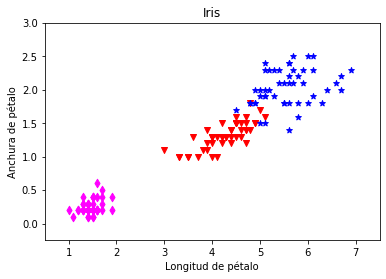

In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
Y = iris.target

fig = plt.figure()
ax = fig.add_subplot()
ax.axis([0.5, 7.5, -0.25, 3])
ax.scatter(X[0:49,0], X[0:49,1], color="magenta", marker="d") 
ax.scatter(X[50:99,0], X[50:99,1], color="r", marker="v") 
ax.scatter(X[100:149,0], X[100:149,1], color="b", marker="*") 
ax.set_title("Iris")

ax.set_xlabel("Longitud de pétalo")
ax.set_ylabel("Anchura de pétalo")
plt.show()

## Empleamos el vecino más próximo

Vemos las fronteras de decisión del vecino más próximo con estos datos

Text(0.5, 1.0, 'KNN (K=1)')

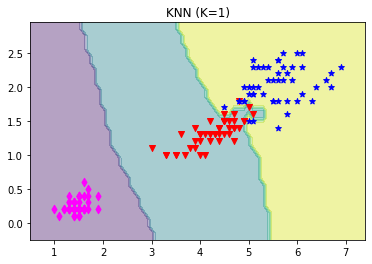

In [7]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


KNNexample = KNeighborsClassifier(n_neighbors=1,weights="distance")
KNNexample.fit(X, Y)

y1_min, y1_max = 0.5, 7.5
y2_min, y2_max = -0.25, 3

xx, yy = np.meshgrid(np.arange(y1_min, y1_max, 0.1),np.arange(y2_min, y2_max, 0.1))

f, axarr = plt.subplots()
Z = KNNexample.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[0:49,0], X[0:49,1], color="magenta",marker="d")
axarr.scatter(X[50:99,0], X[50:99,1], color="r",marker="v")
axarr.scatter(X[100:149,0], X[100:149,1], color="b",marker="*")
axarr.set_title("KNN (K=1)")

## Dividir el conjunto de datos entre training y test y clasificar

Vamos a dividir el conjunto de datos en entrenamiento y test. A continuación emplearemos el entrenamiento para definir un clasificador y el de test para evaluarlo sobre dicho clasificador.

Además vamos a emplear ya las 4 variables que hay en Iris.



In [11]:
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data
Y = iris.target

## Partición train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=12)


## Entrenamiento
kv = KNeighborsClassifier()
knn=kv.fit(X_train,y_train)

## Evaluación sobre el test
acc=knn.score(X_test,y_test)


print(f'Precisión: {acc:.1%}')



Precisión: 96.7%


## Realizar validación cruzada para búsqueda de parámetros

Cuando tenemos tan pocos datos como es el caso de Iris lo ideal es realizar una validación cruzada para obtener una mejor estimación del error de clasificación.

Además vamos a variar el parámetro "K" de los K-vecinos.

The optimal no. of neighbors is 7


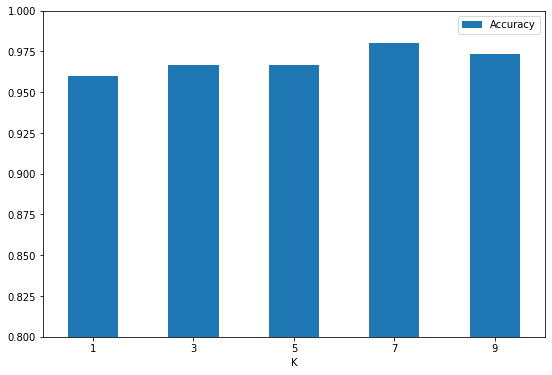

In [37]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()
X = iris.data
Y = iris.target

neighbors = list(range(1,10,2))
cv_scores = [ ]
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K, weights="distance")
    scores = cross_val_score(knn,X,Y,cv = 5,scoring ="accuracy")
    cv_scores.append(scores.mean())
    

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal no. of neighbors is {}".format(optimal_k))

def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,10,2)],
      "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6), ylim=(0.8,1.0),rot=0)
    plt.show()

plot_accuracy(cv_scores)

## Validación cruzada con GridSearch

Una forma muy adecuada de implementar la validación cruzada, sobre todo cuando tenemos muchos parámetros que evaluar es emplear las utilidades que ya tiene sklearn. Como por ejemplo GridSearch. En este caso se nos devuelve siempre el mejor clasificador con el parámetro que mejor resultado ha dado.

In [38]:
from sklearn.model_selection import GridSearchCV

# Creamos un diccionario con todos los parámetros a modificar, en este caso sólo uno
G = {"n_neighbors":range(1,10,2)}  # n_neighbors es el nombre del parámetro

GS = GridSearchCV(KNeighborsClassifier(), G, scoring='accuracy', refit=True, cv=5) # validación cruzada de 5 particiones

knn = GS.fit(X_train, y_train)
print(GS.cv_results_["params"])
print(GS.cv_results_["mean_test_score"])

acc= knn.score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')


[{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}]
[0.98886469 0.98747338 0.98677652 0.98469077 0.98191057]
Precisión: 98.6% con {'n_neighbors': 1}


## Clasificación del dataset Digits

Emplearemos ahora el dataset DIGITS, imágenes de 8x8 píxeles de los 10 dígitos $[0,9]$. En total hay 1797 imágenes de 8x8 píxeles. 

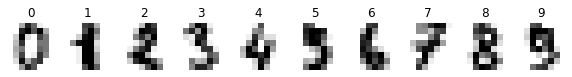

In [33]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % label)

## Ejercicio

Realizar una validación cruzada para encontrar tanto el mejor valor del parámetro K como para el parámetro weights para el que hay que probar dos opciones: "distance" ó "uniform"

## Solución

In [36]:
print(digits.images.shape)

n_samples = len(digits.images)
X=digits.images.reshape(n_samples,-1)
Y=digits.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=12)

# Creamos un diccionario con todos los parámetros a modificar
G = {"n_neighbors":range(1,10,2), "weights":["distance","uniform"]}  

GS = GridSearchCV(KNeighborsClassifier(), G, scoring='accuracy', refit=True, cv=5) # validación cruzada de 5 particiones

knn = GS.fit(X_train, y_train)
print(GS.cv_results_["params"])
print(GS.cv_results_["mean_test_score"])

acc= knn.score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')

(1797, 8, 8)
[{'n_neighbors': 1, 'weights': 'distance'}, {'n_neighbors': 1, 'weights': 'uniform'}, {'n_neighbors': 3, 'weights': 'distance'}, {'n_neighbors': 3, 'weights': 'uniform'}, {'n_neighbors': 5, 'weights': 'distance'}, {'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 7, 'weights': 'distance'}, {'n_neighbors': 7, 'weights': 'uniform'}, {'n_neighbors': 9, 'weights': 'distance'}, {'n_neighbors': 9, 'weights': 'uniform'}]
[0.98886469 0.98886469 0.98817025 0.98747338 0.98747338 0.98677652
 0.98677652 0.98469077 0.98469319 0.98191057]
Precisión: 98.6% con {'n_neighbors': 1, 'weights': 'distance'}
